# Machine Learning with Python

In this notebook, we will explore how to implement artificial neural networks (ANNs) using Python.

<img src="./images/deep_nn.png" width="60%" align="center">

Detailed information on ANNs can be found at *MachineLearningOverview.pdf* which is included in the same repository as this notebook. In this file, we introduce general artificial intelligence (AI) concepts and investigate the structure of ANNs, the parameters involved, the training process and the backpropagation algorithm using comprehensive mathematics.

## Naive Implementation with Python

In this first section, we will use pure Python in order to implement an ANN. This is for gaining better intuition on the underlying processes when we will utilize *tensorflow* and *Keras*, a package from Google which is extendedly used for developing machine learning tasks by software developers throughout the industry.

First, we import some preliminary Python libraries for our task.

In [1]:
# basic package for numerical purposes such as arrays, matrix-vector multiplications e.t.c
import numpy as np
# for plotting
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150 # for higher resolution when displaying content

### Simple ANN with no hidden layers

Consider a network with 3 input neurons and 2 output neurons, as shown below:

<img src="./images/simple_nn.png" width="20%" align="center">

We will use the index $j$ for the input neurons and $k$ for the output neurons. So:

$$ z_k = \sum_{j=1}^{3} w_{kj} x_j + b_k $$

for $k=1,2$, hence

$$ y_k = f(z_k) $$

where we will use the sigmoid function for activation

$$ f(z_k) = \frac{1}{1+e^{-z_k}} $$

In [2]:
neurons_in = 3   # input layer size
neurons_out = 2  # output layer size

# initialize an array of random weights with dimensions neurons_out x neurons_in
w = np.random.uniform(low=-1, high=+1, size=(neurons_out,neurons_in))
# initialize random biases vector with dimension neurons_out
b = np.random.uniform(low=-1, high=+1, size=neurons_out)

In [3]:
# random input values
x_in = np.array([0.2,0.4,-0.1])

Implement a function for output evaluation (will be needed afterwards as well):

In [4]:
# inputs: weights, neuron values, biases, activation
# output: f(w*x_in + b)
def forward(w, x, b, activation):
    z = np.dot(w, x) + b
   
    if activation=='sigmoid':
         y_out = 1/(1+np.exp(-z))
    elif activation=='jump':
        y_out = np.array(z>0,dtype='float')
    elif activation=='linear':
        y_out = z
    elif activation=='reLU':
        y_out= (z>0)*z
    
    return z, y_out

In [5]:
# apply function
z, y_out = forward(w, x_in, b, 'sigmoid')

In [6]:
# print the results
print("Network input x_in:", x_in)
print()
print("Weights:", w)
print()
print("Biases:", b)
print("Linear superposition z:", z)
print("Network output:", y_out)

Network input x_in: [ 0.2  0.4 -0.1]

Weights: [[ 0.38645612  0.6604401  -0.13907286]
 [-0.79040868  0.16630784 -0.11767619]]

Biases: [0.82113492 0.73518105]
Linear superposition z: [1.17650947 0.65539007]
Network output: [0.76431962 0.65822407]


### Visualize network output

Next, we consider 2 input and 1 output neuron for visualization purposes:

In [7]:
neurons_in = 2
neurons_out = 1

w = np.random.uniform(low=-10, high=+10, size=(neurons_out,neurons_in))
b = np.random.uniform(low=-1, high=+1, size=neurons_out)

x_in = np.array([0.8,0.3])

z, y_out = forward(w, x_in, b, 'sigmoid')

# print the results
print("Network input x_in:", x_in)
print()
print("Weights:", w)
print()
print("Biases:", b)
print("Linear superposition z:", z)
print("Network output:", y_out)

Network input x_in: [0.8 0.3]

Weights: [[-7.34864604  0.12249429]]

Biases: [0.92494186]
Linear superposition z: [-4.91722669]
Network output: [0.00726622]


We can define an empty image of $M\times M$ pixels and feed the network input with two values, say, generated from the indices that define the image coordinates:

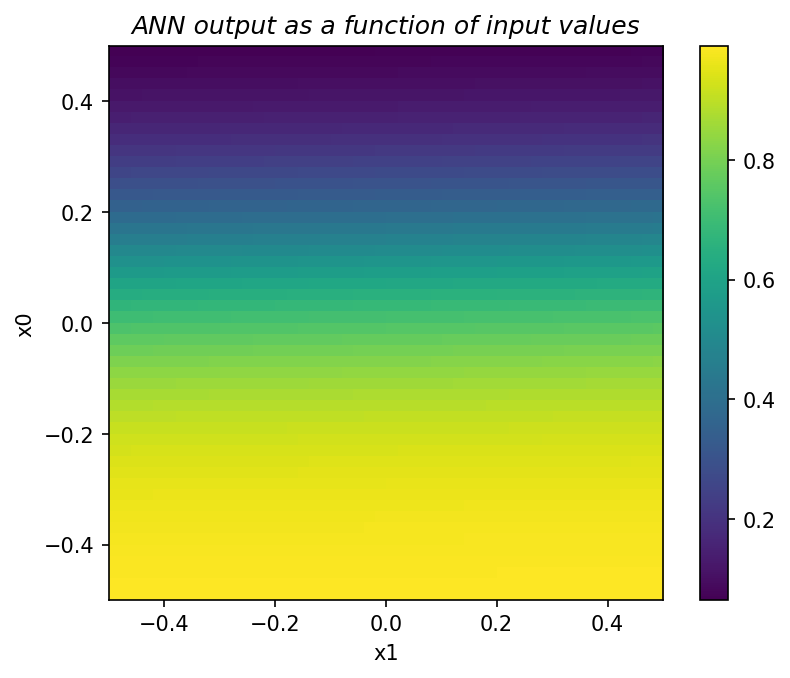

In [8]:
M = 50
y_out = np.zeros([M,M]) # hold the result

for i in range(M):
    for j in range(M):
        # out of these integer indices, generate
        # two values in the range -0.5...0.5
        # and then apply the network to those two
        # input values
        x0 = float(i)/M-0.5
        x1 = float(j)/M-0.5
        y_out[i,j] = forward(w, [x0,x1], b, 'sigmoid')[1]  # take only y_out from tuple
        
# display image
plt.imshow(y_out, origin='lower', extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.title("ANN output as a function of input values", style='italic')
plt.xlabel("x1")
plt.ylabel("x0")
plt.show()

### Visualization with one hidden layer

When dealing with networks with one or more hidden layers, we need to take care of the weight matrices for each pair of subsequent layers. This is an easy task and identified in the following code.

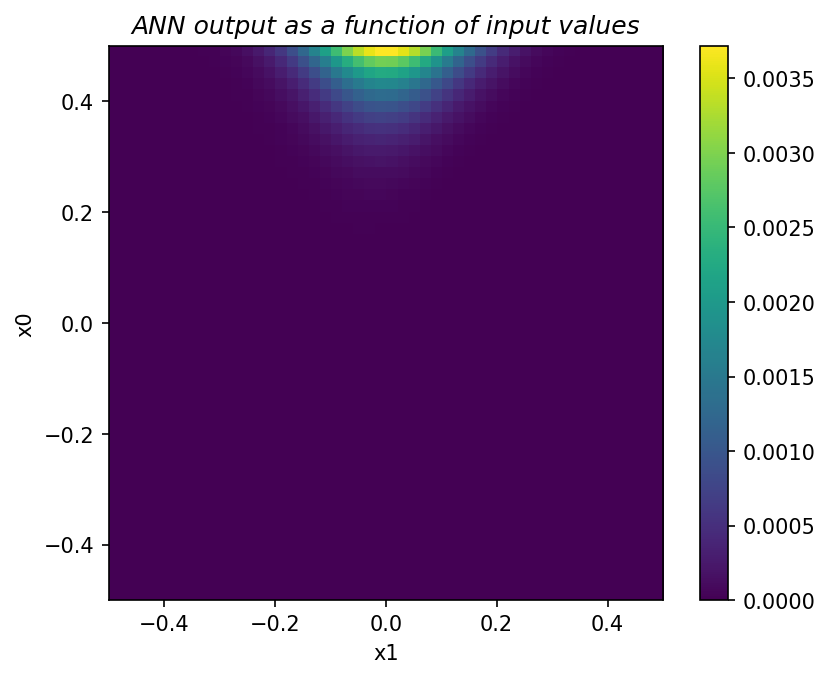

In [9]:
input_layer_size = 2
hidden_layer_size = 30
output_layer_size = 1

# from input layer to hidden layer
w1 = np.random.uniform(low=-10, high=+10, size=(hidden_layer_size,input_layer_size))
b1 = np.random.uniform(low=-1, high=+1, size=hidden_layer_size)

# from hidden layer to output layer
w2 = np.random.uniform(low=-10, high=+10, size=(output_layer_size,hidden_layer_size))
b2 = np.random.uniform(low=-1, high=+1, size=output_layer_size)

M = 50
y_out = np.zeros([M,M]) # hold the result

for i in range(M):
    for j in range(M):
        # out of these integer indices, generate
        # two values in the range -0.5...0.5
        # and then apply the network to those two
        # input values
        x0 = float(i)/M-0.5
        x1 = float(j)/M-0.5
        # evaluate from input to hidden
        y1 = forward(w1, [x0,x1], b1, 'sigmoid')[1]  # take only y_out from tuple
        # evaluate from hidden to input
        y_out[i,j] = forward(w2, y1, b2, 'sigmoid')[1]
        
# display image
plt.imshow(y_out, origin='lower', extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.title("ANN output as a function of input values", style='italic')
plt.xlabel("x1")
plt.ylabel("x0")
plt.show()

The output is even more complex than before due to the introduction of the hidden layer, i.e higher nonlinearity.

### Batch Processing

As described in the *MachineLearningOverview.pdf*, a batch consists of a subset of data where the network is applied to in parallel. Let us see how can this be easily achieved using Python without the need of 'for' loops. We just need to take care of the indices when operating on data.

First, we need to redefine the feedforward process for batch processing. The batch is a matrix of dimensions $ batch\_size \times input\_layer\_size $. So, we just take care of the order of operations.

In [10]:
def forward_batch(w, x, b, activation):
    z = np.dot(x, w) + b
    
    if activation=='sigmoid':
         y_out = 1/(1+np.exp(-z))
    elif activation=='jump':
        y_out = np.array(z>0,dtype='float')
    elif activation=='linear':
        y_out = z
    elif activation=='reLU':
        y_out = (z>0)*z
        
    return z, y_out

In [11]:
input_layer_size = 2
hidden_layer_size = 5
output_layer_size = 1

# from input layer to hidden layer
w1 = np.random.uniform(low=-10, high=+10, size=(input_layer_size,hidden_layer_size)) # new order of dimensions
b1 = np.random.uniform(low=-1, high=+1, size=hidden_layer_size)

# from hidden layer to output layer
w2 = np.random.uniform(low=-10, high=+10, size=(hidden_layer_size,output_layer_size)) # new order of dimensions
b2 = np.random.uniform(low=-1, high=+1, size=output_layer_size)

# generate 10000 samples
batchsize = 10000
x = np.random.uniform(low=-1,high=1,size=(batchsize,input_layer_size))

# apply network
# we just need y_out from function
y_hidden = forward_batch(w1, x, b1, 'sigmoid')[1]
y_output = forward_batch(w2, y_hidden, b2, 'sigmoid')[1]

np.shape(y_output)

(10000, 1)

This means that 10000 samples where processed by the network in parallel, so we have 10000 different outputs!

Let us now visualize this in a more efficient way than we did before. Remember that all the pixels in some picture are samples, so we can process them all together as a batch.

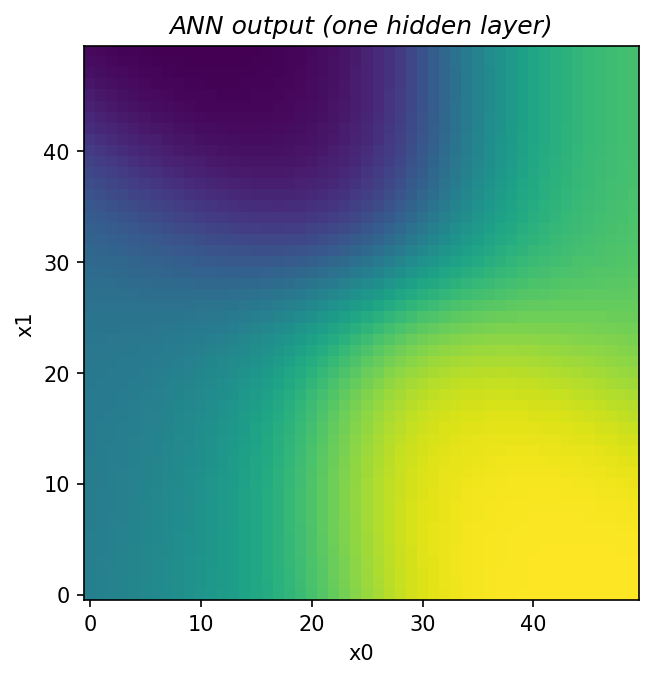

In [12]:
M = 50

# Generate a 'mesh grid', i.e. x,y values in an image
x0, x1 = np.meshgrid(np.linspace(-0.5,0.5,M),np.linspace(-0.5,0.5,M))

# meshgrid returns coordinate matrices from coordinate vectors, so we need a conversion of matrix to vector
x0_vec = x0.flatten()
x1_vec = x1.flatten()

# batchsize is equal to the number of pixels
batchsize = np.shape(x0_vec)[0]

# input batch
x_in = np.zeros([batchsize,2])
x_in[:,0] = x0_vec
x_in[:,1] = x1_vec

# apply the network
y_hidden = forward_batch(w1, x_in, b1, 'sigmoid')[1]
y_output = forward_batch(w2, y_hidden, b2, 'sigmoid')[1]

# convert the output to 2D array
y_2D = np.reshape(y_output[:,0],[M,M])

plt.imshow(y_2D, origin='lower')
plt.title("ANN output (one hidden layer)", style='italic')
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

### Backpropagation Algorithm (Fully Connected Network)

For a thorough analysis on backpropagation and training, see *MachineLearningOverview.pdf*.

Here, we implement the backpropagation algorithm for better intuition. Later, we will use *Keras* interface of the *TensorFlow* library where the user does not have to worry about the implemetation of such inner processes and can solely focus on the application the ANN is intended to.

**NOTE**: The *sigmoid function* is used here, but the code may be modified for other activation functions as well.

First, we redefine the feedforward process in order to return the derivative of the activation function along with the output

In [13]:
def feedforward(x, w, b):
    z = np.dot(x, w) + b  # weighted sum of inputs
    y_out = 1/(1+np.exp(-z))  # sigmoid function of z
    dy_out = np.exp(-z)*(y_out**2)  # derivative of the sigmoid
    
    return y_out, dy_out

Next, we define a new function that applies the network on some given input. Also, *W* contains all the weights of the network, hence it is a vector of matrices corresponding to consequtive layers and *B* is a vector of vectors containing all the biases. *NumLayers* is the total number of layers excluding the input layer.

In [14]:
def apply_net(x, W, B, NumLayers, y_layer, dy_layer):
    
    # go through all layers
    # j=0 is the first hidden layer
    # j=NumLayers-1 is the output layer
    y = x
    y_layer[0] = y
    for j in range(NumLayers):
        y, yd = feedforward(y, W[j], B[j])
        # store f(z) and f'(z), needed later for backpropagation
        dy_layer[j] = yd
        y_layer[j+1] = y
        
    return y, dy_layer, y_layer

Recall the *mean-squared error* cost function

$$ C(w) = \frac{1}{2} \left < (f(z) - F(x^{in}))^2 \right > $$

and its derivative with respect to some weight

$$ \frac{\partial C(w,x^{in})}{\partial w_*} = \sum_j (y_j ^n - F_j (x^{in})) \frac{\partial y_j ^n}{\partial w_*} = \sum_j (y_j ^n - F_j (x^{in}))f'(z_j ^n)  \frac{\partial z_j ^n}{\partial w_*} $$

where $y$ is the network output, $F$ is the target function for input $x^{in}$ and $z$ is the input of the sigmoid. The upper index indicates the layer for those values.

Remember that $y_j ^n = f(z_j ^n)$, so if we apply the chain rule repeatedly for the term $\frac{\partial z_j ^n}{\partial w_*}$, we get

$$
\frac{\partial z_j ^n}{\partial w_*} = \sum_k \frac{\partial z_j ^n}{\partial y_k ^{n-1}}\frac{\partial y_k ^{n-1}}{\partial w_*} = \sum_k w_{jk} ^{n,n-1} f'(z_k ^{n-1}) \frac{\partial z_k ^{n-1}}{\partial w_*}
$$

As we are mainly focused on batch processing with a batch of size *batchsize*, we have the following dimensions:

 - *delta* = $(y_j ^n - F_j (x^{in}))f'(z_j ^n) \ \rightarrow \ batchsize \times \textit{size of layer n}$
 - $w \ \rightarrow \ \textit{size of layer n-1} \times \textit{size of layer n}$
 - $f'(z_k ^{n-1}) \ \rightarrow \ batchsize \times \textit{size of layer n-1}$

We define a function for this step as:

In [15]:
def backstep(delta, W, df):
    return(np.dot(delta, np.transpose(W))*df)

Now, we can define the backward pass through the network. The inputs can be easily identified by their names.

In [16]:
def backprop(y_target, y_layer, df_layer, W, B, NumLayers, dW_layer, dB_layer, batchsize):
    
    # initialize output vector
    delta = (y_layer[-1] - y_target)*df_layer[-1]
    # gradient of the cost function with respect to the corresponding weight and bias
    dW_layer[-1] = np.dot(np.transpose(y_layer[-2]), delta)/batchsize
    dB_layer[-1] = delta.sum(0)/batchsize  # sum all batch samples (columns of delta)
    
    for j in range(NumLayers-1):
        delta = backstep(delta, W[-1-j], df_layer[-2-j])
        dW_layer[-2-j] = np.dot(np.transpose(y_layer[-3-j]), delta)
        dB_layer[-2-j] = delta.sum(0)/batchsize

At last, we need to update the parameters:

In [17]:
# eta is the learning rate
def update(eta, dW_layer, dB_layer, W, B):
    
    for j in range(NumLayers):
        W[j] -= eta*dW_layer[j]
        B[j] -= eta*dB_layer[j]

The function that trains the network is shown below:

In [18]:
# one full training batch
def train_nn(x_in, y_target, eta, batchsize, W, B, NumLayers, y_layer, df_layer):
    
    y_out_nn = apply_net(x_in, W, B, NumLayers, y_layer, df_layer)[0]
    
    backprop(y_target, y_layer, df_layer, W, B, NumLayers, dW_layer, dB_layer, batchsize)
    update(eta, dW_layer, dB_layer, W, B)
    cost = ((y_target-y_out_nn)**2).sum()/batchsize
    
    return cost, y_out_nn  # return the network output as well (for plotting)

#### Example: ANN Training (Same batch repeatedly)

Let us now train an ANN on the same data batch in each iteration and plot the cost function with respect to the number of batches that we process. We expect the network cost to decrease, but this is only because of one input!

Consider a particular ANN as below:

In [19]:
# set up the hyperparameters, the weights and biases

NumLayers = 3 # excluding the input layer
LayerSizes = [2,20,30,1] 

# initialize random weights and biases for all layers (except input)
W = [np.random.uniform(low=-1,high=+1,size=[ LayerSizes[j],LayerSizes[j+1] ]) for j in range(NumLayers)]
B = [np.random.uniform(low=-1,high=+1,size=LayerSizes[j+1]) for j in range(NumLayers)]

# define the batchsize
batchsize = 100

# set up all the helper variables
y_layer = [np.zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)]
df_layer = [np.zeros([batchsize,LayerSizes[j+1]]) for j in range(NumLayers)]
dW_layer = [np.zeros([LayerSizes[j],LayerSizes[j+1]]) for j in range(NumLayers)]
dB_layer = [np.zeros(LayerSizes[j+1]) for j in range(NumLayers)]

# random training samples
x_in = np.random.uniform(low=-1,high=+1,size=[batchsize,LayerSizes[0]])
y_target = np.random.uniform(low=-1,high=+1,size=[batchsize,LayerSizes[-1]])

In [20]:
# one training step
train_nn(x_in, y_target, .0001, batchsize, W, B, NumLayers, y_layer, df_layer)[0]
# returns cost function value

0.43129392896025054

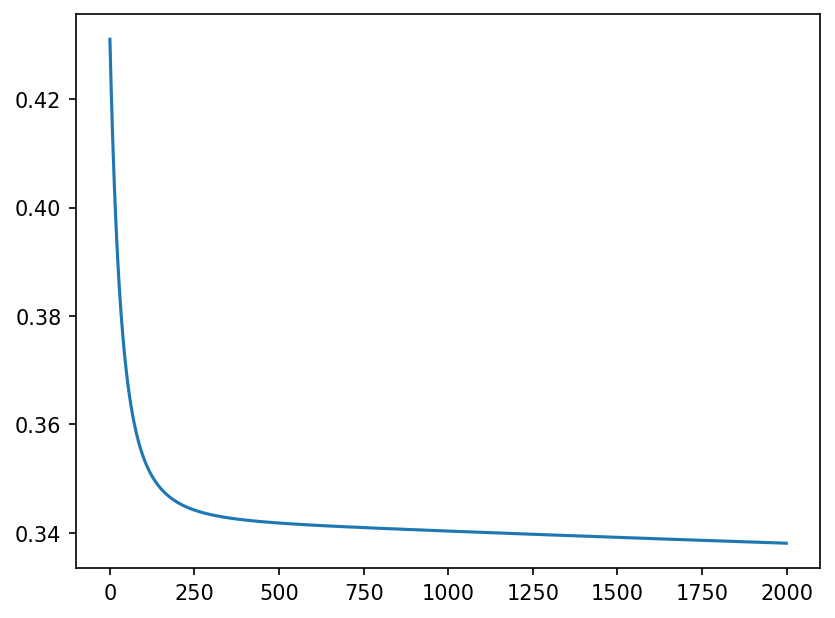

In [21]:
eta = 0.001
batches = 2000

costs = np.zeros(batches) # array to store the costs
net_out = np.zeros([batches,1]) # store network output

for k in range(batches):
    costs[k], net_out = train_nn(x_in, y_target, eta, batchsize, W, B, NumLayers, y_layer, df_layer)
    
plt.plot(costs)
plt.show()

#### Random Sampling a 2D function

Consider the following function with two variables $ x_0,x_1 \in \mathbb{R} $:

$$ f(x_0,x_1) = e^{-5(x_0^ 2 + x_1 ^2)} \left | x_0 + x_1 \right | $$

Let us plot $f$ through 40 equally spaced points in $[-0.5,0.5]$ using numpy and matplotlib:

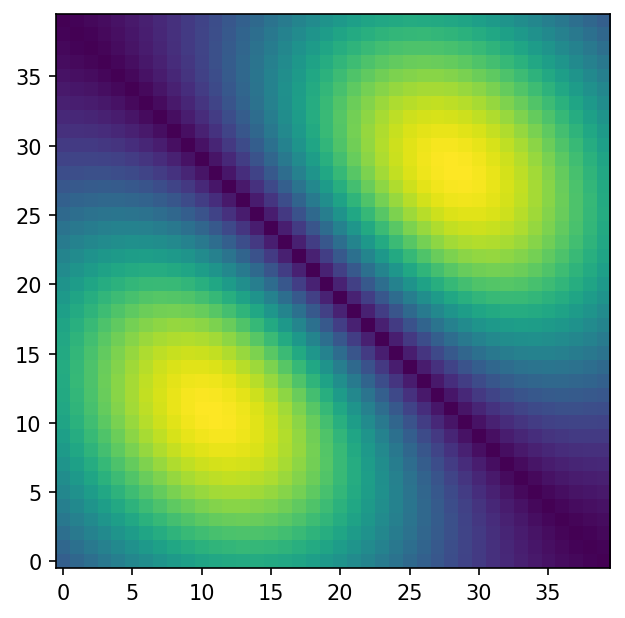

In [22]:
def myFunc(x0,x1):
    r2 = x0**2+x1**2
    return(np.exp(-5*r2)*np.abs(x1+x0))

xrange = np.linspace(-0.5,0.5,40)
X0, X1 = np.meshgrid(xrange,xrange)
plt.imshow(myFunc(X0,X1), interpolation='nearest', origin='lower')
plt.show()

We are going to train a neural network such that it can reproduce this function with high accuracy. The training samples consist of 2D inputs $ (x_0,x_1) $ and the one dimensional target output $ f(x_0,x_1) $. Thus, we need an input layer of 2 neurons and an output layer with a single neuron. Also, we choose to use one hidden layer with 100 neurons.

First, we define a function that returns a batch of training samples as described:

In [23]:
def make_batch(batchsize):

    inputs = np.random.uniform(low=-0.5,high=+0.5,size=[batchsize,2])
    targets = np.zeros([batchsize,1]) # must have right dimensions
    targets[:,0] = myFunc(inputs[:,0],inputs[:,1])
    return inputs,targets

Now, let us set up the parameters of our network:

In [24]:
NumLayers = 2
LayerSizes = [2,100,1]

W = [np.random.uniform(low=-0.1,high=+0.1,size=[ LayerSizes[j],LayerSizes[j+1] ]) for j in range(NumLayers)]
B = [np.zeros(LayerSizes[j+1]) for j in range(NumLayers)]

y_layer = [np.zeros(LayerSizes[j]) for j in range(NumLayers+1)]
df_layer = [np.zeros(LayerSizes[j+1]) for j in range(NumLayers)]
dW_layer = [np.zeros([LayerSizes[j],LayerSizes[j+1]]) for j in range(NumLayers)]
dB_layer = [np.zeros(LayerSizes[j+1]) for j in range(NumLayers)]

In [25]:
# set a batchsize
batchsize = 100

We use all of the above in order to train the network for 2000 batches and plot the cost function as shown below:

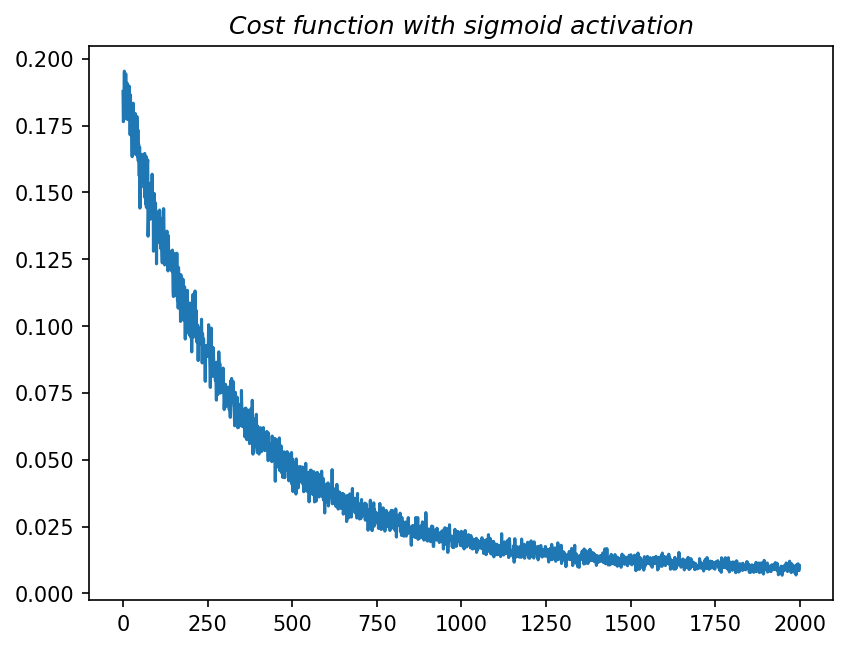

In [26]:
eta = 0.001
batches = 2000
costs = np.zeros(batches)
net_out = np.zeros(batches) # store network output

for k in range(batches):
    x_in, y_target = make_batch(batchsize)
    costs[k], net_out = train_nn(x_in, y_target, eta, batchsize, W, B, NumLayers, y_layer, df_layer)

plt.plot(costs)
plt.title("Cost function with sigmoid activation", style='italic')
plt.show()

Also, plot the approximate function from the network outputs:

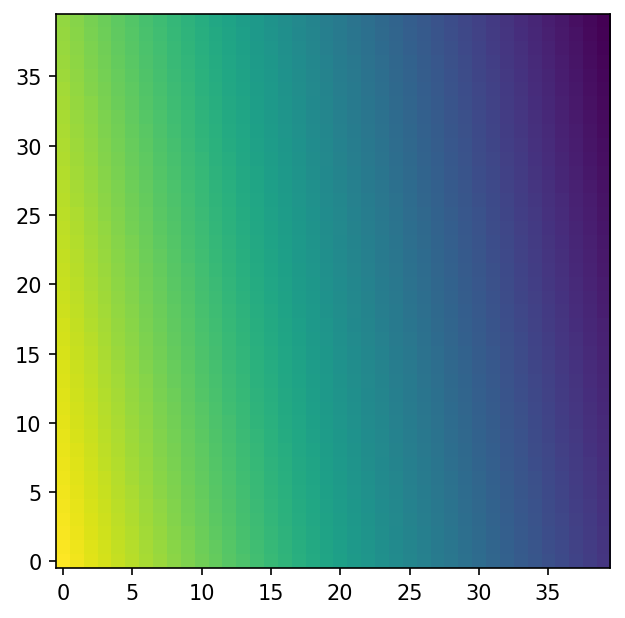

In [27]:
test_batchsize = np.shape(X0)[0]*np.shape(X0)[1]
testsample = np.zeros([test_batchsize,2])
testsample[:,0] = X0.flatten()
testsample[:,1] = X1.flatten()

testoutput = apply_net(testsample, W, B, NumLayers, y_layer, df_layer)[0]
plt.imshow(np.reshape(testoutput,np.shape(X0)), origin='lower', interpolation='none')
plt.show()

This does not look like the original function at all. Although the cost function decreases with respect to the iterations, it is still high, thus the accuracy is really low.

What if we used the rectified linear units (RELU) function for activation ?

In [28]:
def feedforward(x, w, b):
    z = np.dot(x, w) + b  # weighted sum of inputs
    y_out = z*(z>0) # RELU
    dy_out = z>0  # derivative
    
    return y_out, dy_out

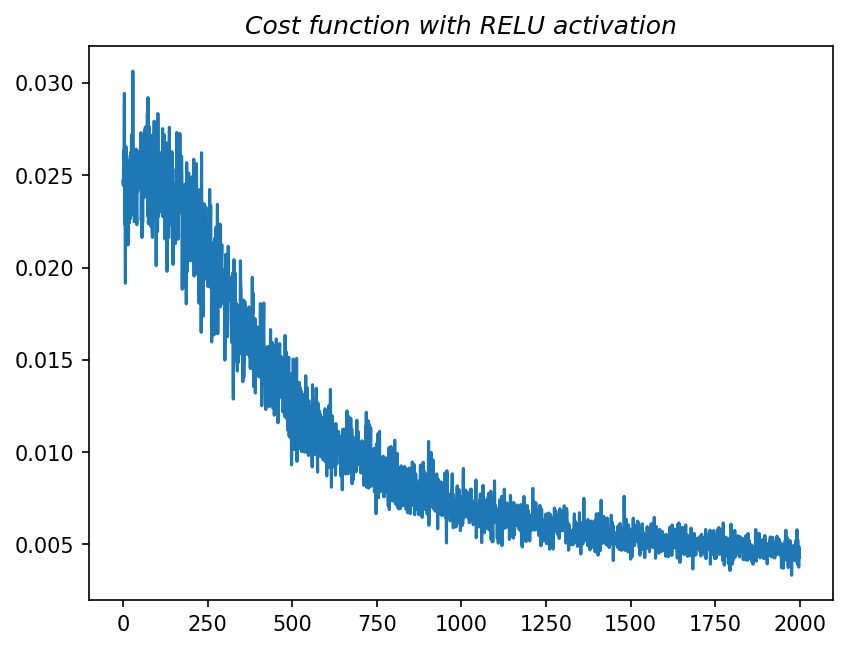

In [29]:
# initialize parameters
W = [np.random.uniform(low=-0.1,high=+0.1,size=[ LayerSizes[j],LayerSizes[j+1] ]) for j in range(NumLayers)]
B = [np.zeros(LayerSizes[j+1]) for j in range(NumLayers)]

y_layer = [np.zeros(LayerSizes[j]) for j in range(NumLayers+1)]
df_layer = [np.zeros(LayerSizes[j+1]) for j in range(NumLayers)]
dW_layer = [np.zeros([LayerSizes[j],LayerSizes[j+1]]) for j in range(NumLayers)]
dB_layer = [np.zeros(LayerSizes[j+1]) for j in range(NumLayers)]

for k in range(batches):
    x_in, y_target = make_batch(batchsize)
    costs[k], net_out = train_nn(x_in, y_target, eta, batchsize, W, B, NumLayers, y_layer, df_layer)

plt.plot(costs)
plt.title("Cost function with RELU activation", style='italic')
plt.show()

The cost here is almost 10 times lower than before when we used the sigmoid for activation. Let us have a look at the function that is produced by the neural network.

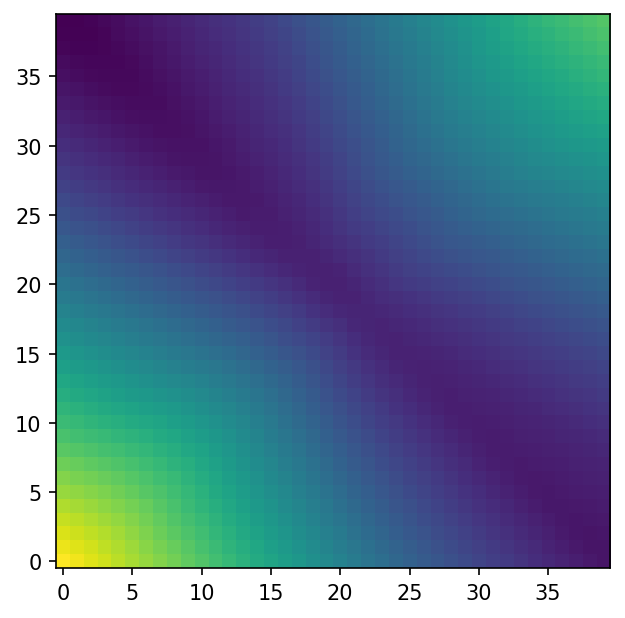

In [30]:
test_batchsize = np.shape(X0)[0]*np.shape(X0)[1]
testsample = np.zeros([test_batchsize,2])
testsample[:,0] = X0.flatten()
testsample[:,1] = X1.flatten()

testoutput = apply_net(testsample, W, B, NumLayers, y_layer, df_layer)[0]
plt.imshow(np.reshape(testoutput,np.shape(X0)), origin='lower', interpolation='none')
plt.show()

This is obviously a better approximation to the original function. However, training still has low accuracy.

### Remarks on Training an ANN

From all the aforementioned, it is clear that training accuracy depends on the setup of the parameters of the ANN. Those should be chosen carefully by the designer in order to implement an efficient model. However, there is no standard procedure on these adjustments and one should proceed by trial and error, as the implementation depends on the task of interest. The questions that arise:

 - How do I find a 'good' dataset for the needs of the task ?
 - How many samples are actually 'good enough' ?
 - How many hidden layers should I choose (and how many neurons in each) ? 
 - What nonlinear activation functions are suitable ?
 - What cost function better suits the application ?
 - How about the learning rate, the batch size and the total number of batches ?
 - Does the random initialization of weights and biases has an impact on training ?
 - Does my network perform well on unseen data ?
 
It comes out that one of the most difficult tasks includes *data scraping, mining*, or *extraction*, whatsoever. The designer should first collect proper training samples and work out the *preprocessing*, as this data may include misleading samples, noise, or some data may be missing. This is another area of study that the designer must be aware of, where the need of *statistics* and *probability theory* plays a vital role. Preparing the training data is not an easy task, as it takes time, patience and dedication. However, carefully chosen and processed samples for a specific task shall increase the accuracy of the model and its diversification on unseen data. Thankfully, there are various databases with large amounts of data nowadays provided by companies and analysts and very sophisticated datasets for a variety of machine learning tasks.

All things considered, *learning* is clearly a stochastic and very complex nonlinear process !

#### Influence of Learning Rate

For completeness, let us see how the learning rate influences the training process on the last example above:

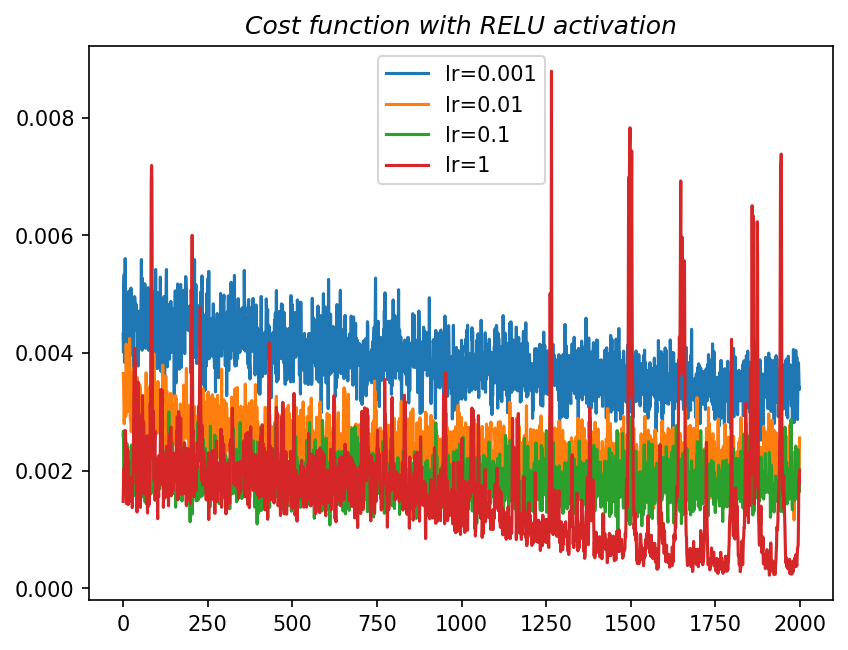

In [31]:
eta = [0.001, 0.01, 0.1, 1]

for lr in eta:
    for k in range(batches):
        x_in, y_target = make_batch(batchsize)
        costs[k] = train_nn(x_in, y_target, lr, batchsize, W, B, NumLayers, y_layer, df_layer)[0]

    plt.plot(costs)
    
plt.title("Cost function with RELU activation", style='italic')
plt.legend(['lr=0.001', 'lr=0.01', 'lr=0.1', 'lr=1'])
plt.show()

Increasing the learning rate results in faster training but causes undesirable divergent behavior in the cost function, as it can be seen from above. There are serious fluctuations on the cost. If the learning rate is set too low, training will progress very slowly as we are making very tiny updates to the weights in the network.

Moreover, batch size and learning rate have a reverse relationship. Small batch size and large learning rate can cause even more problems to the training process.

At last, another factor to consider is the randomness when initializing the weights and biases of the network, which can also cause large fluctuations during training.

All of the aforementioned has to do with parameter optimization, which is the main task of the designer of a machine learning model in order to get the desired results.